In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plot
import theano
from sklearn.datasets import fetch_mldata
import sklearn.datasets as sk_data

%matplotlib inline 
# mnist = fetch_mldata('MNIST original', data_home=sk_data.get_data_home())

def vectorize_y(Y):
    v_y = np.zeros((Y.shape[0], max(set(Y.flatten()))+1))
    print v_y.shape
    for i in range(len(Y)):
        v_y[i][Y[i]] = 1.0
    return v_y


In [ ]:
SPLIT_1 = 0.5
SPLIT_2 = 0.75

def shuffle(X, Y):
    Y = np.array([Y.flatten()]).T
    A = np.concatenate((X, Y),axis=1)
    np.random.shuffle(A)
    print A.shape
    X_prime, Y_prime = np.hsplit(A, [-1])
    if (set(Y_prime.flatten())!=set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])):
        return shuffle(X,Y)
    return X_prime, Y_prime


XX, YY = shuffle(mnist.data, mnist.target)
train_xx, test_xx = np.vsplit(XX, [len(mnist.data)*SPLIT_1])
train_yy, test_yy = np.array_split(YY, [len(mnist.data)*SPLIT_1])

train_x, test_x = np.vsplit(train_xx, [len(train_xx)*SPLIT_2])
train_y, test_y = np.array_split(train_yy, [len(train_yy)*SPLIT_2])

print train_x.shape
print test_x.shape
print train_y.shape
print test_y.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


# model = RandomForestClassifier()
# model.fit(train_x, train_y)
# y_prime = model.predict(test_x)

# pipeline = Pipeline([('pca', PCA()), ('estimator', LinearSVC())])
# param_grid = [
#     {
#         'pca': [PCA()]
#     }
# ]
# model = GridSearchCV(pipeline, cv=2, param_grid=param_grid)
# model.fit(train_x, train_y)
# y_prime = model.predict(test_x)


pca = PCA(svd_solver='randomized',whiten=True).fit(train_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)
model = LinearSVC()
model.fit(train_x, train_y)
y_prime = model.predict(test_x)


In [ ]:
acc = accuracy_score(y_prime, test_y)
print acc

In [ ]:
print type(mnist)
print mnist.data.shape
print mnist.target.shape
img = mnist.data[0].reshape((28,28))
print img.shape
plot.subplot(1, 2, 1)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(1, 2, 2)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')



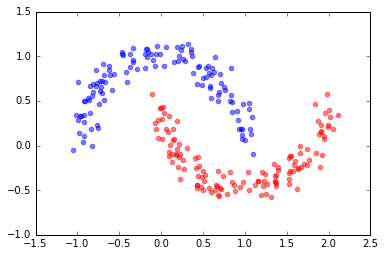

In [8]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.1)
# X,y = make_blobs(centers=2, cluster_std=0.5, n_samples=500)
[x_train, x_test] = np.vsplit(X, [len(X)/2])
[y_train, y_test] = np.vsplit(y.reshape(y.shape[0],1), [len(y)/2])
K = np.hsplit(x_train, [1])

X1 = [K[0][i] for i in range(len(y_train)) if y_train[i]!=0]
X2 = [K[1][i] for i in range(len(y_train)) if y_train[i]!=0]

X3 = [K[0][i] for i in range(len(y_train)) if y_train[i]==0]
X4 = [K[1][i] for i in range(len(y_train)) if y_train[i]==0]

plot.scatter(X1, X2, color='r', alpha=0.5)
plot.scatter(X3, X4, color='b', alpha=0.5)

K2 = np.hsplit(x_test, [1])


In [10]:
from sklearn.linear_model import LogisticRegression
import NN
from NN import NN
from sklearn.metrics import accuracy_score
from NN import shuffle

# model = LogisticRegression()
# model.fit(x_train, y_train)
# y_hat = model.predict(x_test)

vec_y_train = vectorize_y(y_train)

model = NN(2)
model.addDense(6)
model.addDense(6)
model.addDense(6)
model.addDense(2)
model.summary()
model.fit(x_train, vec_y_train, epoch=2000, n_minibatch=50)

# X5 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]!=0]
# X6 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]!=0]

# X7 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]==0]
# X8 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]==0]

# plot.scatter(X5, X6, color='r', alpha=0.5)
# plot.scatter(X7, X8, color='b', alpha=0.5)
# plot.scatter(X1, X2, color='r', alpha=0.5)
# plot.scatter(X3, X4, color='b', alpha=0.5)

# print "ACC:", accuracy_score(y_hat, y_test)


(250, 2)
size=2
weight=(2, 6) bias=(1, 6) f=<function _NN__SIGMOID at 0x114df3320>
size=6
weight=(6, 6) bias=(1, 6) f=<function _NN__SIGMOID at 0x114df3320>
size=6
weight=(6, 6) bias=(1, 6) f=<function _NN__SIGMOID at 0x114df3320>
size=6
weight=(6, 2) bias=(1, 2) f=<function _NN__SIGMOID at 0x114df3320>
size=2
epoch 1/2000
	loss= 0.52
epoch 2/2000
	loss= 0.46
epoch 3/2000
	loss= 0.4
epoch 4/2000
	loss= 0.6
epoch 5/2000
	loss= 0.5
epoch 6/2000
	loss= 0.4
epoch 7/2000
	loss= 0.58
epoch 8/2000
	loss= 0.62
epoch 9/2000
	loss= 0.52
epoch 10/2000
	loss= 0.54
epoch 11/2000
	loss= 0.44
epoch 12/2000
	loss= 0.58
epoch 13/2000
	loss= 0.42
epoch 14/2000
	loss= 0.52
epoch 15/2000
	loss= 0.58
epoch 16/2000
	loss= 0.46
epoch 17/2000
	loss= 0.64
epoch 18/2000
	loss= 0.54
epoch 19/2000
	loss= 0.42
epoch 20/2000
	loss= 0.62
epoch 21/2000
	loss= 0.58
epoch 22/2000
	loss= 0.44
epoch 23/2000
	loss= 0.54
epoch 24/2000
	loss= 0.54
epoch 25/2000
	loss= 0.54
epoch 26/2000
	loss= 0.48
epoch 27/2000
	loss= 0.42

ACC: 0.736


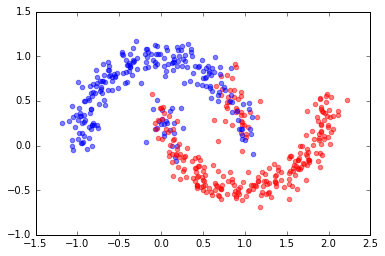

In [11]:
y_hat = [model.predict(x_i) for x_i in x_test]

X5 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]!=0]
X6 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]!=0]

X7 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]==0]
X8 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]==0]

plot.scatter(X5, X6, color='r', alpha=0.5)
plot.scatter(X7, X8, color='b', alpha=0.5)
plot.scatter(X1, X2, color='r', alpha=0.5)
plot.scatter(X3, X4, color='b', alpha=0.5)

print "ACC:", accuracy_score(y_hat, y_test)